In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
sns.set()
sns.set_context("paper")

In [52]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']

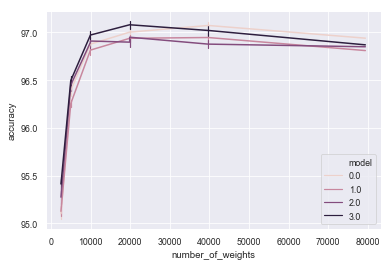

In [53]:
tmp = s.loc[s['pruning_perc'] == 50]
tmp = tmp.loc[tmp['pruning_method'] == 'magnitude_class_blinded']
tmp = tmp.loc[tmp['accuracy'] > 95]
tmp = tmp.append(original, ignore_index=True)
tmp['model'] = tmp['model'].astype(float)

# plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='model', err_style='bars', data=tmp, markers=True, ci='sd', legend='full', linewidth=1.5)

## Comparison of pruning strategies

C:\Users\paulh\Anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\paulh\Anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\paulh\Anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

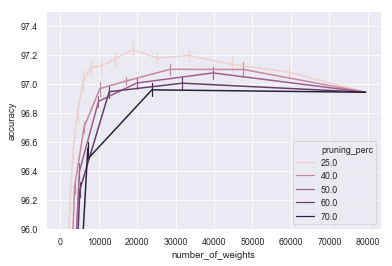

In [54]:
tmp = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
# tmp = tmp.loc[tmp['accuracy'] > 95]

original['pruning_perc'] = 25
tmp = tmp.append(original, ignore_index=True)
original['pruning_perc'] = 40
tmp = tmp.append(original, ignore_index=True)
original['pruning_perc'] = 50
tmp = tmp.append(original, ignore_index=True)
original['pruning_perc'] = 60
tmp = tmp.append(original, ignore_index=True)
original['pruning_perc'] = 70
tmp = tmp.append(original, ignore_index=True)

tmp['pruning_perc'] = tmp['pruning_perc'].astype(float)
tmp = tmp.loc[tmp['model'] == 0]

s = tmp.loc[tmp['pruning_perc'] == 25]
s = s.loc[s['run'] == 0]

plt.ylim(96, 97.5)
sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=tmp, markers=True, ci='sd', legend='full', linewidth=1.5)

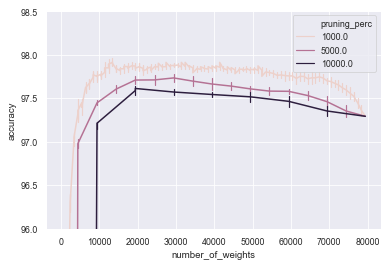

In [44]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)

plt.ylim(96, 98.5)
sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)

C:\Users\paulh\Anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


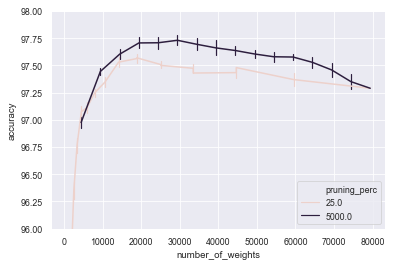

In [207]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)
s = s.loc[s['pruning_perc'] == 5000]
s = s.loc[s['number_of_weights'] != 0]

s2 = pd.read_pickle('./results/experiment2.pkl')
original2 = s2.loc[s2['pruning_method'] == 'original']
original2['pruning_perc'] = 25
s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded']
s2 = s2.loc[s2['variable'] == False]
s2 = s2.loc[s2['pruning_perc'] == 25]
s2 = s2.loc[s2['number_of_weights'] != 0]
s2 = s2.append(original2, ignore_index=True)

s = s.append(s2, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)
plt.ylim(96, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)

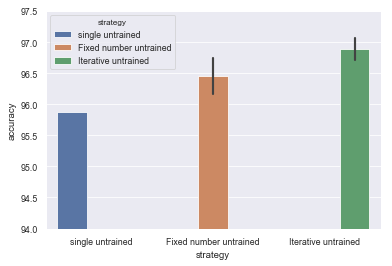

In [211]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 85]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s['strategy'] = 'Single'

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['accuracy'] = t['accuracy'].astype(float)
t['strategy'] = 'single untrained'
#t['run'] = s['run']
#t['variable'] = 2.0
#t['pruning_perc'] = 50
#t['retrain_change'] = 0
#t['retrain_epochs'] = 0
#t['time'] = 0

s2 = pd.read_pickle('./results/experiment3.pkl')
s2 = s2.loc[s2['pruning_perc'] == 5000]
s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded_absolute']
s2 = s2.loc[s2['number_of_weights'] == 9400]
s2['strategy'] = 'Fixed number'

t2 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t2['accuracy'] = s2['accuracy'] - s2['retrain_change']
t2['number_of_weights'] = s2['number_of_weights']
t2['accuracy'] = t2['accuracy'].astype(float)
t2['strategy'] = 'Fixed number untrained'

s3 = pd.read_pickle('./results/experiment2.pkl')
s3 = s3.loc[s3['pruning_method'] == 'magnitude_class_blinded']
s3 = s3.loc[s3['number_of_weights'] == 10598]
s3 = s3.loc[s3['variable'] == False]
s3['strategy'] = 'Iterative'

t3 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t3['accuracy'] = s3['accuracy'] - s3['retrain_change']
t3['number_of_weights'] = s3['number_of_weights']
t3['accuracy'] = t3['accuracy'].astype(float)
t3['strategy'] = 'Iterative untrained'

s = s.append(s2, ignore_index=True)
s = s.append(s3, ignore_index=True)

t = t.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)
plt.ylim(94, 97.5)
sns.barplot(x='strategy', y='accuracy', hue='strategy', data=t, ci='sd')

## Analysis of effect of retraining on pruning

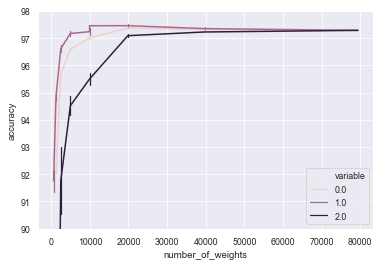

In [208]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s = s.loc[s['accuracy'] > 90]
s = s.loc[s['pruning_perc'] == 50]

original['variable'] = True
s = s.append(original, ignore_index=True)
original['variable'] = False
s = s.append(original, ignore_index=True)

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])

t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['run'] = s['run']
t['variable'] = s['variable']
t['pruning_perc'] = 50
t['retrain_change'] = 0
t['retrain_epochs'] = 0
t['pruning_method'] = 'magnitude_class_blinded'
t['time'] = 0
t['accuracy'] = t['accuracy'].astype(float)
t = t.loc[t['variable'] == False]
t['variable'] = 2.0

s.loc[s['variable'] == True, ['variable']] = 1.0
s.loc[s['variable'] == False, ['variable']] = 0.0

s = s.append(t, ignore_index=True)
plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='variable', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)

## Comparison of different pruning methods

## Baseline experiments